Stability of defection, optimisation of strategies and the limits of memory in the PD.
-----------------------

## 4. Formulation including noise

In [1]:
import opt_mo
import numpy as np
import sympy as sym

sym.init_printing()


In [2]:
import itertools
import axelrod as axl

from fractions import Fraction


In [3]:
import pandas as pd


In [4]:
import matplotlib.pyplot as plt
import matplotlib


In [5]:
font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)


In [6]:
p_n = sym.symbols("p_n")

In [7]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")
q_1, q_2, q_3, q_4 = sym.symbols("q_1, q_2, q_3, q_4")


In [8]:
p = (p_1, p_2, p_3, p_4)
q = (q_1, q_2, q_3, q_4)


In [9]:
p = [p_i * p_n for p_i in p]
q = [q_i * p_n for q_i in q]

Utility
-------

The markov chain $M$.

In [10]:
M = opt_mo.mem_one_match_markov_chain(player=p, opponent=q)


In [11]:
with open("../tex/m_matrix_with_noise.tex", "w") as f:
    f.write("M = {}".format(sym.latex(sym.Matrix(M))))

Let $v$ be the stationary vector of $M$, where $M$ is the transition matrix $M(p,q)$.

In [14]:
R, S, T, P = sym.symbols("R, S, T, P")
payoffs = np.array([R, S, T, P])


In [15]:
def pd_utility(S_p, x, y):
    """
    Returns the utility as a function
    of p, q vectors. Based on Press and Dyson, 2012.
    """
    B = sym.Matrix(opt_mo.make_B(S_p, x, y))
    unit = sym.Matrix(opt_mo.make_B((1, 1, 1, 1), x, y))
    return B.det() / unit.det()


In [16]:
S_p = sym.Matrix([[R, S, T, P]])

In [17]:
utility = pd_utility(S_p, p, q)


In [18]:
numerator = sym.fraction(utility.simplify())[0]
denominator = sym.fraction(utility.simplify())[1]


**Numerator**

In [48]:
from sympy.abc import *

In [42]:
ps = np.array((p_1, p_2, p_3, p_4))
Q_num = np.array([[numerator.coeff(f1 * f2) for f2 in (p_1, p_2, p_3, p_4)] for f1 in (p_1, p_2, p_3, p_4)])
c_num = np.array(
    [
        numerator.subs({p_2: 0, p_3: 0, p_4: 0}).coeff(p_1),
        numerator.subs({p_1: 0, p_3: 0, p_4: 0}).coeff(p_2),
        numerator.subs({p_1: 0, p_2: 0, p_4: 0}).coeff(p_3),
        numerator.subs({p_1: 0, p_2: 0, p_3: 0}).coeff(p_4),
    ]
)


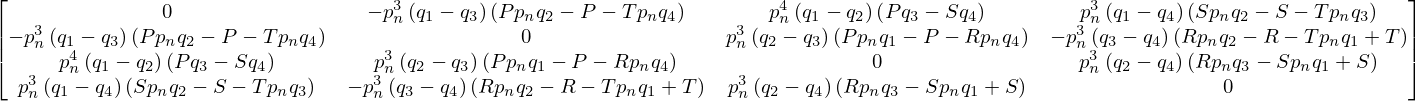

In [64]:
sym.Matrix(Q_num).applyfunc(sym.factor)

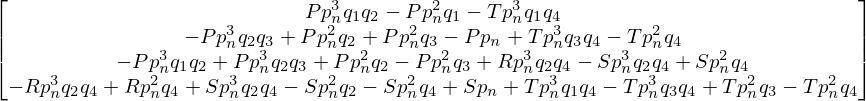

In [24]:
sym.Matrix(c_num)

In [25]:
expr = np.dot(ps, Q_num.dot(ps.T) * 1 / 2) + np.dot(c_num, ps.T)
constant = numerator.expand() - expr


In [59]:
constant.simplify().collect(p_n)


In [65]:
for file, name in zip(
    [sym.Matrix(Q_num).applyfunc(sym.factor), sym.Matrix(c_num).applyfunc(sym.factor), constant.simplify().collect(p_n)],
    ["q_numerator", "c_numerator", "numerator_constant"],
):

    with open("../tex/{}_with_noise.tex".format(name), "w") as f:
        f.write("{}".format(sym.latex(file)))


**Denominator**

In [33]:
Q_den = np.array([[denominator.coeff(f1 * f2) for f2 in (p_1, p_2, p_3, p_4)] for f1 in (p_1, p_2, p_3, p_4)])
c_den = np.array(
    [
        denominator.subs({p_2: 0, p_3: 0, p_4: 0}).coeff(p_1),
        denominator.subs({p_1: 0, p_3: 0, p_4: 0}).coeff(p_2),
        denominator.subs({p_1: 0, p_2: 0, p_4: 0}).coeff(p_3),
        denominator.subs({p_1: 0, p_2: 0, p_3: 0}).coeff(p_4),
    ]
)


In [34]:
expr = np.dot(ps, Q_den.dot(ps.T) * 1 / 2) + np.dot(c_den, ps.T)
den_constant = denominator.expand() - expr


In [31]:
Q_den = sym.Matrix([[element.factor() for element in row] for row in Q_den])
c_den = sym.Matrix([element.factor() for element in c_den])


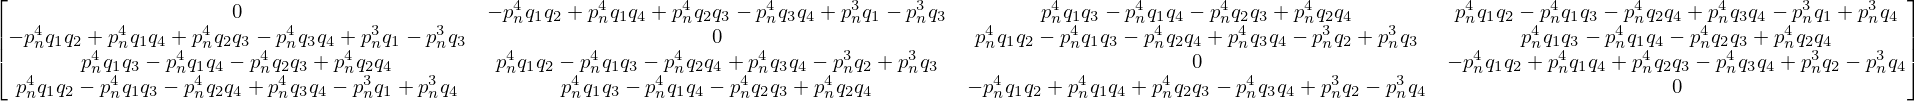

In [37]:
sym.Matrix(Q_den)

In [66]:
for file, name in zip(
    [sym.Matrix(Q_den).applyfunc(sym.factor), sym.Matrix(c_den).applyfunc(sym.factor), den_constant.simplify().collect(p_n)],
    ["q_denominator", "c_denominator", "denominator_constant"],
):

    with open("../tex/{}_with_noise.tex".format(name), "w") as f:
        f.write("{}".format(sym.latex(file)))
